In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

class State(TypedDict):
    graph_state: str


In [2]:
def node1(state):
    print("node1")
    return {"graph_state" : state["graph_state"] + "I'm"}

def node2(state):
    print("node1")
    return {"graph_state" : state["graph_state"] + " Happy!"}

def node3(state):
    print("node1")
    return {"graph_state" : state["graph_state"] + " Sad!"}

In [3]:
import random
from typing import Literal

def decide_moode(state) -> Literal["node2", "node3"] :

    user_input = state["graph_state"]

    # Check the random value
    if random.random() > 0.6:
        return "node2"
    
    return "node3"

In [4]:
builder = StateGraph(State)
builder.add_node("node1", node1)
builder.add_node("node2", node2)
builder.add_node("node3", node3)

builder.add_edge(START, "node1")
builder.add_conditional_edges("node1", decide_moode)
builder.add_edge("node2", END)
builder.add_edge("node3", END)

graph = builder.compile()

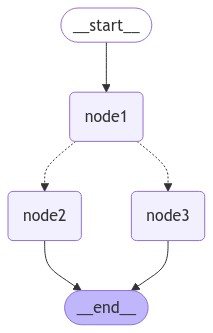

In [5]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
graph.invoke({"graph_state" : "Hi, This is Harry"})

node1
node1


{'graph_state': "Hi, This is HarryI'm Sad!"}